In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import scipy.optimize as so
import functools

In [3]:
def allan_FOGM(sigma, rho, ms):
    '''
    Takes in two doubles defining a FOGM (sigma and rho) and the values at which
    their Allan Variance should be charaterized (ms) and returns the corresponding
    Allan Variance values

    Inputs:
    -   sigma:  What the marginal variance is at each sample
    -   rho:  Correlation between adjacent values
    -   ms:  Size of the blocks to be averaged (corresponds with tau when multiplied by dt)
    
    Outputs: an np.array of values of the same size as ms
    '''
    going_out = np.zeros(len(ms))
    for i,m in enumerate(ms):
        tmp = 1-rho
        tmp2 = m + 2*rho/tmp *(m-(1-rho**m)/tmp) - rho * ((1-rho**m)/tmp)**2
        going_out[i] = tmp2*sigma**2/m**2
    return going_out

def d_allan_FOGM_d_m(sigma, rho, m):
    '''
    Takes in two doubles defining a FOGM (sigma and rho) and the values at which
    the derivative should be computed (m) and returns the corresponding derivative

    Inputs:
    -   sigma:  What the marginal variance is at each sample
    -   rho:  Correlation between adjacent values
    -   m:  Value at which the derivative should be computed
    
    Outputs: an np.array of values of the same size as ms
    '''
    tmp = 1-rho
    tmp1 = rho**m
    tmp2 = m + 2*rho/tmp *(m-(1-tmp1)/tmp) - rho * ((1-tmp1)/tmp)**2
    tmp3 = -2*sigma**2/m**3 * tmp2
    tmp4 = sigma**2/m**2 * (1+ 2*rho/tmp * (1 + tmp1 * log(rho)/tmp) + 2*rho * (1-tmp1)/tmp**2 * tmp1 * log(rho))
    return tmp3+tmp4

Functions defined. Now let's analyze them

for rho of 0.9, last slope is -1.8999946e-13
loglog slope at end is -0.9999985789453488
loglog slope at beginning is 0.6381753270027563
for rho of 0.99, last slope is -1.989940599999998e-12
loglog slope at end is -0.9999850751541365
loglog slope at beginning is 0.9086074139023484
for rho of 0.995, last slope is -3.989761199999996e-12
loglog slope at end is -0.9999700742924486
loglog slope at beginning is 0.92398373038468
for rho of 0.999, last slope is -1.9984005999999978e-11
loglog slope at end is -0.9998500525566537
loglog slope at beginning is 0.9363092033927468
for rho of 0.9999, last slope is -1.9939006000002177e-10
loglog slope at end is -0.9984978218491926
loglog slope at beginning is 0.9390911645604039
for rho of 0.99999, last slope is -1.9399906000085553e-09
loglog slope at end is -0.9847716509060278
loglog slope at beginning is 0.9323201830350708


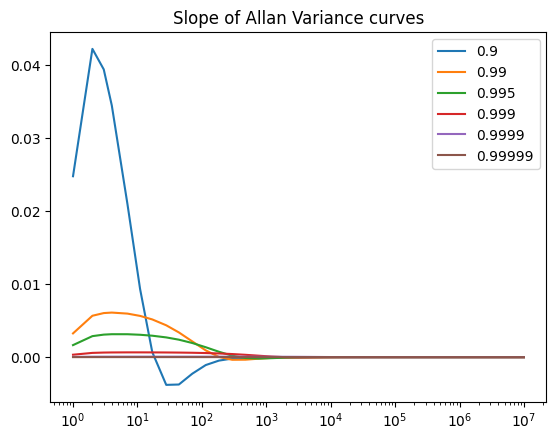

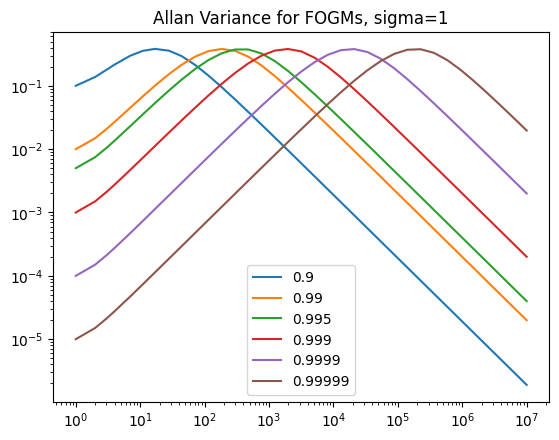

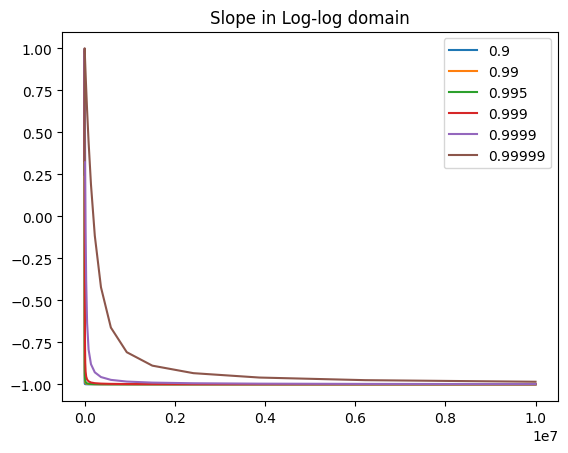

In [7]:
rhos = [.9, .99, .995, .999, .9999, .99999]
ms = np.rint(np.logspace(0,7,35, endpoint=True))

for rho in rhos:
    # Plot the slopes
    da_dm = [d_allan_FOGM_d_m(1,rho,m) for m in ms]
    plt.figure(1)
    plt.plot(ms,da_dm,label=f'{rho}')
    # Plot the actual Allan values
    allan_vals = allan_FOGM(1,rho,ms)
    plt.figure(2)
    plt.loglog(ms,allan_vals,label=f'{rho}')
    # Plot the log-log slopes
    plt.figure(3)
    plt.plot(ms,da_dm*ms/allan_vals,label=f'{rho}')
    # Print some information to understand slope before/after the peak
    print(f'for rho of {rho}, last slope is {da_dm[-1]}')
    print(f'loglog slope at end is {da_dm[-1]*ms[-1]/allan_vals[-1]}')
    #  Using 3 to try and find slope not at m=1.  Math does weird things when 0<m<1
    print(f'loglog slope at beginning is {da_dm[3]*ms[3]/allan_vals[3]}')
plt.figure(1)
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.title('Slope of Allan Variance curves')
plt.figure(2)
plt.legend()
plt.title('Allan Variance for FOGMs, sigma=1')

plt.figure(3)
plt.legend()
plt.title('Slope in Log-log domain')

plt.show()

# Find the hump and the value at that hump

In [8]:
rhos = [.9, .99, .999, .9999, .99999]

# Store values to write out LaTeX strings at the end
tab_header = np.array(rhos)
peak_loc = np.zeros(len(rhos))
ratios = np.zeros(len(rhos))
peak_val = np.zeros(len(rhos))
# Do the actual computation
for i,rho in enumerate(rhos):
    # Find the peak locations
    func = functools.partial(d_allan_FOGM_d_m,1,rho)
    peak = so.fsolve(func,1/(1-rho))
    peak_loc[i] = peak
    print(f'for rho of {rho}, peak is at {peak}, value is {allan_FOGM(1,rho,peak)}')
    peak_val[i] = allan_FOGM(1,rho,peak)
    # It worked so remove this line...
    # print(f'to double check, slope(peak) is {d_allan_FOGM_d_m(1,rho,peak)}')
    print(f'2/(1-rho) is {2/(1-rho)}, ratio is {peak/2*(1-rho)}')
    ratios[i] = peak/2*(1-rho)
# Print out values for a LaTeX table
print()
print('==== LaTeX Table information ====')
tmp_str = np.array2string(tab_header,separator = " & ")
print("& "+tmp_str[1:-1]+"\\\\\\hline") # remove the brackets
tmp_str = np.array2string(peak_loc,separator = " & ",precision=4)
print("Peak Location & "+tmp_str[1:-1]+"\\\\\\hline")
tmp_str = np.array2string(ratios,separator = " & ",precision=4)
print("Ratio to $\\frac{2}{1-\\rho}$ &"+tmp_str[1:-1]+"\\\\\\hline")
tmp_str = np.array2string(peak_val,separator = " & ",precision=4)
print("$a_m$ at peak & " + tmp_str[1:-1]+"\\\\\\hline")


for rho of 0.9, peak is at [17.82225198], value is [0.38274836]
2/(1-rho) is 20.000000000000004, ratio is [0.8911126]
for rho of 0.99, peak is at [188.30050873], value is [0.38115324]
2/(1-rho) is 199.99999999999983, ratio is [0.94150254]
for rho of 0.999, peak is at [1891.67003426], value is [0.3811388]
2/(1-rho) is 1999.9999999999982, ratio is [0.94583502]
for rho of 0.9999, peak is at [18925.23187143], value is [0.38113866]
2/(1-rho) is 20000.0000000022, ratio is [0.94626159]
for rho of 0.99999, peak is at [189260.83696956], value is [0.38113866]
2/(1-rho) is 200000.0000009102, ratio is [0.94630418]

==== LaTeX Table information ====
& 0.9     & 0.99    & 0.999   & 0.9999  & 0.99999\\\hline
Peak Location & 1.7822e+01 & 1.8830e+02 & 1.8917e+03 & 1.8925e+04 & 1.8926e+05\\\hline
Ratio to $\frac{2}{1-\rho}$ &0.8911 & 0.9415 & 0.9458 & 0.9463 & 0.9463\\\hline
$a_m$ at peak & 0.3827 & 0.3812 & 0.3811 & 0.3811 & 0.3811\\\hline


# What I've learned:
1. The "top" value is essentially the same for different rho's.  The odd part is it seems to be converging to ~.381139 (times sigma**2).  Smaller rho values are ever so slightly larger
2. The peak lies at a 'm' value slightly smaller than 2/(1-rho) (~.946 to be exact)
3. Slopes (in log-log) go to -1 after the hump, not as sure about positive slopes on the left.  (There are weird things as m goes to 1, so I'm not sure if it being slope < 1 is because the slope is less than one or for some other reason)
